# Fisher Linear Discriminant

### Students: 
* Mattes Ohse   (337356)
* Florian Ebert (391837)
* Rodrigo Alexis Pardo Meza 
* Bertty Contreras Rojas

In this exercise, we apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates two data matrices corresponding to: *infant (I)*, *non-infant (N)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots the projection on the first dimension of the data representing the length of the abalone.

(1342, 7) (2835, 7)


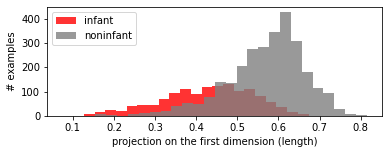

In [1]:
%matplotlib inline
import utils,numpy

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.I.shape, abalone.N.shape)

# Project data on the first dimension
w1 = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension (length)')

## Implementation (10 + 5 + 5 = 20 P)

* **Create a function `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a function `objective(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a function `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [2]:
def mean_vector(X):
    dimensions = X.shape[1]
    return X.mean(axis=0).reshape([dimensions, 1]), dimensions
    
#calculate the scatter_matrix
def scatter_matrix(X):
    points = X.shape[0]
    mean, dimensions = mean_vector(X)
    sub_x_mean = X.T - mean
    #scatter = numpy.zeros([dimensions, dimensions])
    #for x_tmp in sub_x_mean.T:
    #    x_k = x_tmp.reshape([dimensions, 1])
    #    scatter += numpy.matmul(x_k, x_k.T)
    scatter = sub_x_mean.dot(sub_x_mean.T)
    return scatter, mean


def get_Ss_matrix(X1, X2):
    S_x1, x1_mean = scatter_matrix(X1)
    N_x1 = X1.shape[0]
    
    S_x2, x2_mean = scatter_matrix(X2)
    N_x2 = X2.shape[0]
    
    S_w = S_x1 + S_x2
    
    sub_means =  x1_mean - x2_mean
    S_b =  sub_means.dot(sub_means.T)
    
    return S_w, S_b, sub_means

def fisher(X1,X2):
    S_w, S_b, sub_means = get_Ss_matrix(X1, X2)
    
    w = numpy.linalg.inv(S_w).dot((sub_means))
    
    return w / numpy.linalg.norm(w)
    

def objective(X1,X2,w):
    S_w, S_b, _= get_Ss_matrix(X1, X2)
    upper = w.T.dot(S_b.dot(w))
    down =  w.T.dot(S_w.dot(w))
    jw = upper / down
    return jw.item()

def unique_combinatorial(N, size=2):
    x_pos = numpy.arange(N)
    return numpy.unique(
                numpy.sort(
                    numpy.array(
                        numpy.meshgrid(
                            x_pos, 
                            x_pos
                        )
                    ).T.reshape(-1,size)
                ),
                axis=0
            )

def phi(X):
    d = X.shape[0]
    exp = numpy.empty([int((d *(d+3))/2)])
    exp[0:d] = X
    index = d
    comb = unique_combinatorial(d)
    for mul in comb:
        exp[index] = X[mul[0]] * X[mul[1]]
        index += 1
    return exp
    
def expand(X):    
    return numpy.array([phi(x) for x in X])


## Analysis (5 + 5 = 10 P)

* **Print value of the objective function and the histogram for several values of `w`:**

  * `w` is a canonical coordinate vector for the first feature (length).
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).

first dimension (length): 0.00048


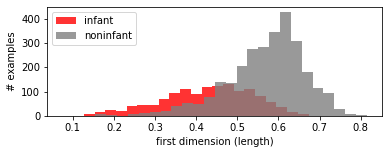

Means Linear: 0.00050


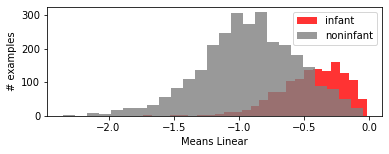

Fisher: 0.00057


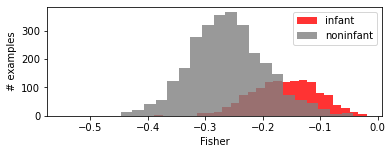

Fisher after expansion: 0.00077


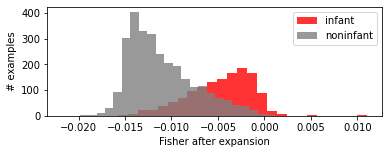

In [3]:
%matplotlib inline

X1 = abalone.I
X2 = abalone.N


def show(X1, X2, w, label):
    objective_value = objective(X1, X2, w)
    print('{}: {:.5f}'.format(label, objective_value))
    abalone.plot(w, label)

# w = canonical coordinate vector for the first feature (length).
w1 = numpy.array([1,0,0,0,0,0,0])
show(X1, X2, w1, 'first dimension (length)')


# w = the difference between the mean vectors of the two classes.
_a, _b, sub_means = get_Ss_matrix(X1, X2)
show(X1, X2, sub_means, 'Means Linear')

# w = he Fisher linear discriminant.
w_fisher = fisher(X1, X2)
show(X1, X2, w_fisher, 'Fisher')

#w = the Fisher linear discriminant (after quadratic expansion of the data).
X1_exp = expand(X1)
X2_exp = expand(X2)
abalone.I = X1_exp
abalone.N = X2_exp
w_fisher_exp = fisher(X1_exp, X2_exp)
show(X1_exp, X2_exp, w_fisher_exp, 'Fisher after expansion')
